In [27]:
import pandas as pd
import numpy as np
import os

from collections import Counter
from glob import glob

In [4]:
compare_phrase="D:/project/voice_pathology_ai/voice_data/results/BASELINE"
compare_vowel="D:/project/voice_pathology_ai/voice_data/results/vowel_fusion"

glob(compare_phrase+"/*.xlsx")


['D:/project/voice_pathology_ai/voice_data/results/BASELINE\\BASELINE.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/BASELINE\\wav_res_phrase_seed_1004_organics_speaker.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/BASELINE\\wav_res_phrase_seed_1005_organics_speaker.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/BASELINE\\wav_res_phrase_seed_1006_organics_speaker.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/BASELINE\\wav_res_phrase_seed_1007_organics_speaker.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/BASELINE\\wav_res_phrase_seed_1008_organics_speaker.xlsx']

In [5]:

glob(compare_vowel+"/*.xlsx")

['D:/project/voice_pathology_ai/voice_data/results/vowel_fusion\\wav_res_concat_latefusion_vowel_fusion_seed_1004_organics_speaker.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/vowel_fusion\\wav_res_concat_latefusion_vowel_fusion_seed_1005_organics_speaker.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/vowel_fusion\\wav_res_concat_latefusion_vowel_fusion_seed_1006_organics_speaker.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/vowel_fusion\\wav_res_concat_latefusion_vowel_fusion_seed_1007_organics_speaker.xlsx',
 'D:/project/voice_pathology_ai/voice_data/results/vowel_fusion\\wav_res_concat_latefusion_vowel_fusion_seed_1008_organics_speaker.xlsx']

In [6]:
speaker_file_path = "../voice_data/only_organics_healthy_available_ver2.xlsx" # 퓨전셋에 맞게 01.10 수정
speaker_file_path_abs = os.path.abspath(speaker_file_path)

speaker_df = pd.read_excel(speaker_file_path)

In [7]:
phrase_df = pd.read_excel("D:/project/voice_pathology_ai/voice_data/results/BASELINE\\wav_res_phrase_seed_1004_organics_speaker.xlsx")


vowel_df =pd.read_excel("D:/project/voice_pathology_ai/voice_data/results/vowel_fusion\\wav_res_concat_latefusion_vowel_fusion_seed_1004_organics_speaker.xlsx")

In [8]:
vowel_correct=vowel_df.where((vowel_df['result']==True) & (vowel_df['fold']==1) ).dropna()['filename'].astype(np.int64)
vowel_wrong=vowel_df.where((vowel_df['result']==False) & (vowel_df['fold']==1) ).dropna()['filename'].astype(np.int64)

In [9]:
len(vowel_wrong)

51

In [10]:
phrase_correct=phrase_df.where((phrase_df['result']==True) & (phrase_df['fold']==1) ).dropna()['filename'].astype(np.int64)
phrase_wrong=phrase_df.where((phrase_df['result']==False) & (phrase_df['fold']==1) ).dropna()['filename'].astype(np.int64)

In [11]:
len(phrase_wrong)

30

In [12]:
set(phrase_wrong) - set(vowel_wrong)
#vowel은 맞췄지만, phrase는 틀린

{60, 79, 94, 993, 1097, 1223, 1229, 1325, 1349, 1540, 1671, 1764, 2407, 2508}

In [13]:
list_vowel_get=list(set(phrase_wrong) - set(vowel_wrong))
speaker_df_vowel_get=speaker_df[speaker_df['RECORDING'].isin(list_vowel_get)]
speaker_df_vowel_get


,RECORDING,PATHOLOGY,DATE,SPEAKER,GENDER,AGE,DETAIL,DIAG
84,1223,p,27/01/1999,1611,m,36,Rekurrensparese,neurogenic
85,1325,p,12/05/1999,1611,m,37,Rekurrensparese,neurogenic
92,1229,p,27/01/1999,1617,w,37,Laryngitis; Reinke ?em,structural
249,1671,p,12/04/2000,1970,m,30,Rekurrensparese,neurogenic
293,1764,p,02/08/2000,2028,m,78,Stimmlippenpolyp,structural
481,2508,p,29/10/2003,2642,m,48,Rekurrensparese,neurogenic
615,94,n,16/01/1998,110,w,55,control,control
674,2407,n,18/09/2002,2541,w,63,control,control
832,993,n,28/10/1998,793,m,23,control,control
916,1097,n,26.11.1998,868,w,24,control,control


In [14]:
set(vowel_wrong) - set(phrase_wrong)
#phrase은 맞췄지만, vowel는 틀린

{157,
 708,
 904,
 928,
 1026,
 1257,
 1277,
 1444,
 1447,
 1551,
 1664,
 1713,
 1790,
 1797,
 1804,
 1807,
 1817,
 1821,
 1832,
 1834,
 1902,
 1940,
 1950,
 1972,
 1974,
 2015,
 2030,
 2141,
 2219,
 2227,
 2283,
 2304,
 2320,
 2424,
 2538}

In [15]:
list_phrase_get=list(set(vowel_wrong) - set(phrase_wrong))
speaker_df_phrae_get=speaker_df[speaker_df['RECORDING'].isin(list_phrase_get)]
speaker_df_phrae_get

,RECORDING,PATHOLOGY,DATE,SPEAKER,GENDER,AGE,DETAIL,DIAG
49,904,p,02/09/1998,1498,m,48,Laryngitis,structural
58,928,p,30/09/1998,1521,w,25,Rekurrensparese,neurogenic
94,1447,p,25/08/1999,1617,w,38,Laryngitis; Reinke ?em,structural
109,1277,p,17/03/1999,1641,m,60,Rekurrensparese,neurogenic
112,1257,p,03/03/1999,1643,w,32,Laryngitis,structural
141,1664,p,05/04/2000,1716,w,60,Rekurrensparese,neurogenic
142,1713,p,31/05/2000,1716,w,60,Rekurrensparese,neurogenic
186,1444,p,25/08/1999,1794,w,43,Rekurrensparese,neurogenic
210,1551,p,08/12/1999,1859,m,58,GERD; Kontaktpachydermie,structural
273,1790,p,06/09/2000,2027,w,36,Spasmodische Dysphonie,neurogenic


In [23]:
print("phrase는 맞췄지만 vowel wrong speaker",len(set(list(speaker_df[speaker_df['RECORDING'].isin(list_phrase_get)]['SPEAKER']))) ) 

print("phrase는 맞췄지만 vowel wrong SAMPLE",len(set(list(speaker_df[speaker_df['RECORDING'].isin(list_phrase_get)]['RECORDING']))) ) 


phrase는 맞췄지만 vowel wrong speaker 21
phrase는 맞췄지만 vowel wrong SAMPLE 35


In [26]:
from collections import Counter
Counter(list(speaker_df[speaker_df['RECORDING'].isin(list_phrase_get)]['PATHOLOGY']))


Counter({'p': 30, 'n': 5})

In [24]:
print("phrase는 맞췄지만 vowel wrong speaker",len(set(list(speaker_df[speaker_df['RECORDING'].isin(list_vowel_get)]['SPEAKER']))) ) 

print("phrase는 맞췄지만 vowel wrong SAMPLE",len(set(list(speaker_df[speaker_df['RECORDING'].isin(list_vowel_get)]['RECORDING']))) ) 


phrase는 맞췄지만 vowel wrong speaker 13
phrase는 맞췄지만 vowel wrong SAMPLE 14


In [28]:
Counter(list(speaker_df[speaker_df['RECORDING'].isin(list_vowel_get)]['PATHOLOGY']))

Counter({'p': 6, 'n': 8})

# 스팩트로그램 비교

In [31]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


phrase_audios = []
vowel_audios = []

phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1223-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1325-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1229-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1671-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1764-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/2508-phrase.wav')

vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1223-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1325-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1229-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1671-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1764-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/2508-a_h.wav')

phrase_audios =[ librosa.load(aud, sr=sr)[0] for aud in phrase_audios ]
vowel_audios =[ librosa.load(aud, sr=sr)[0] for aud in vowel_audios ]



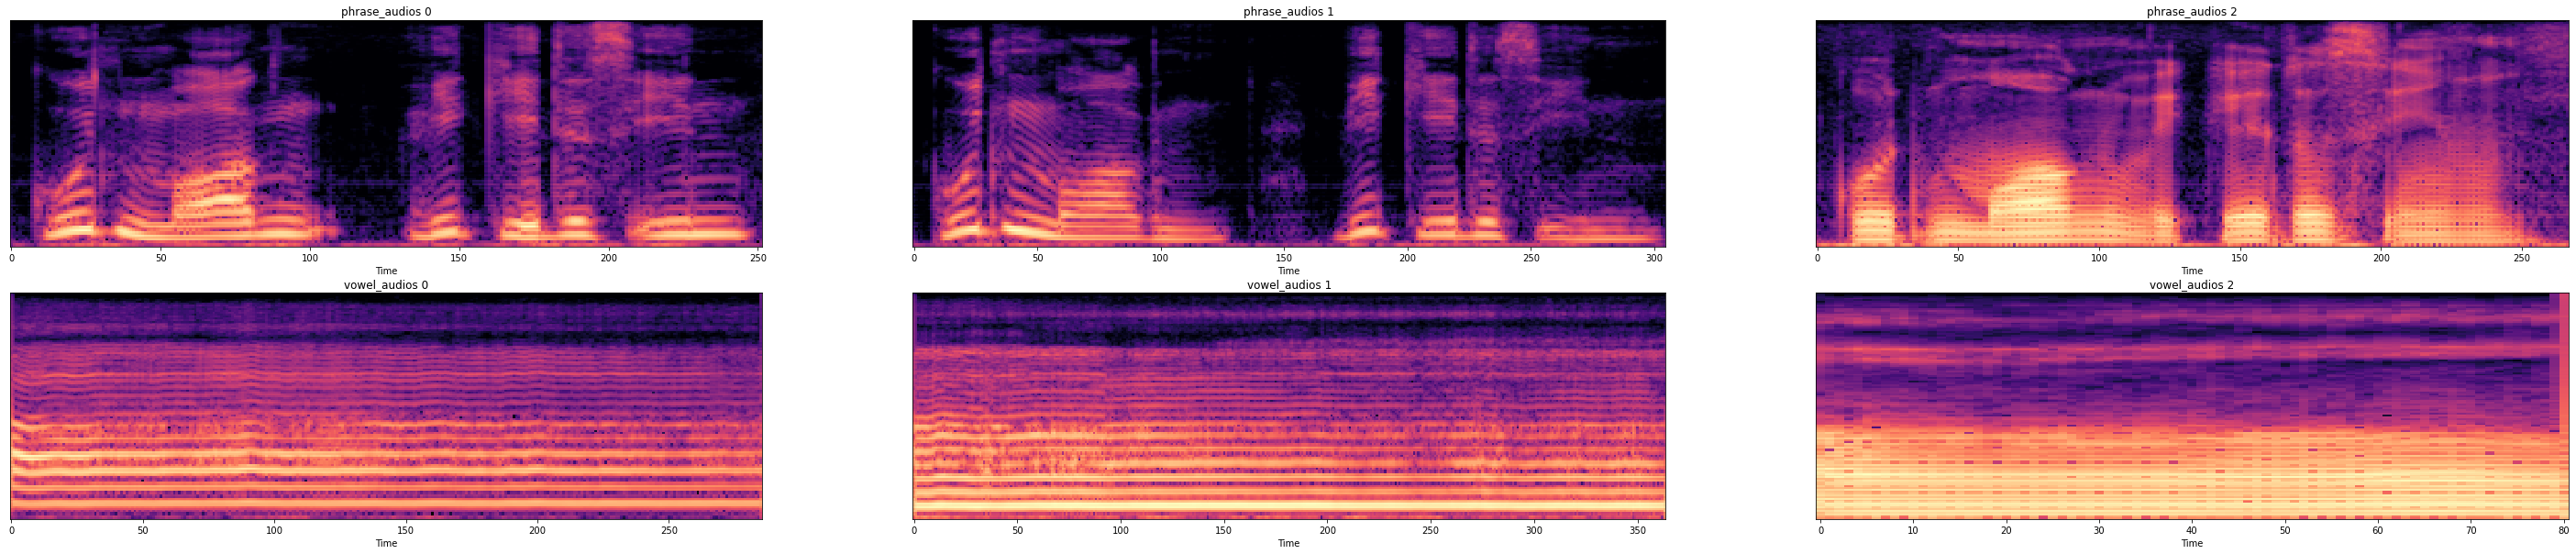

In [46]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(phrase_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("phrase_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(vowel_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("vowel_audios "+str(i))

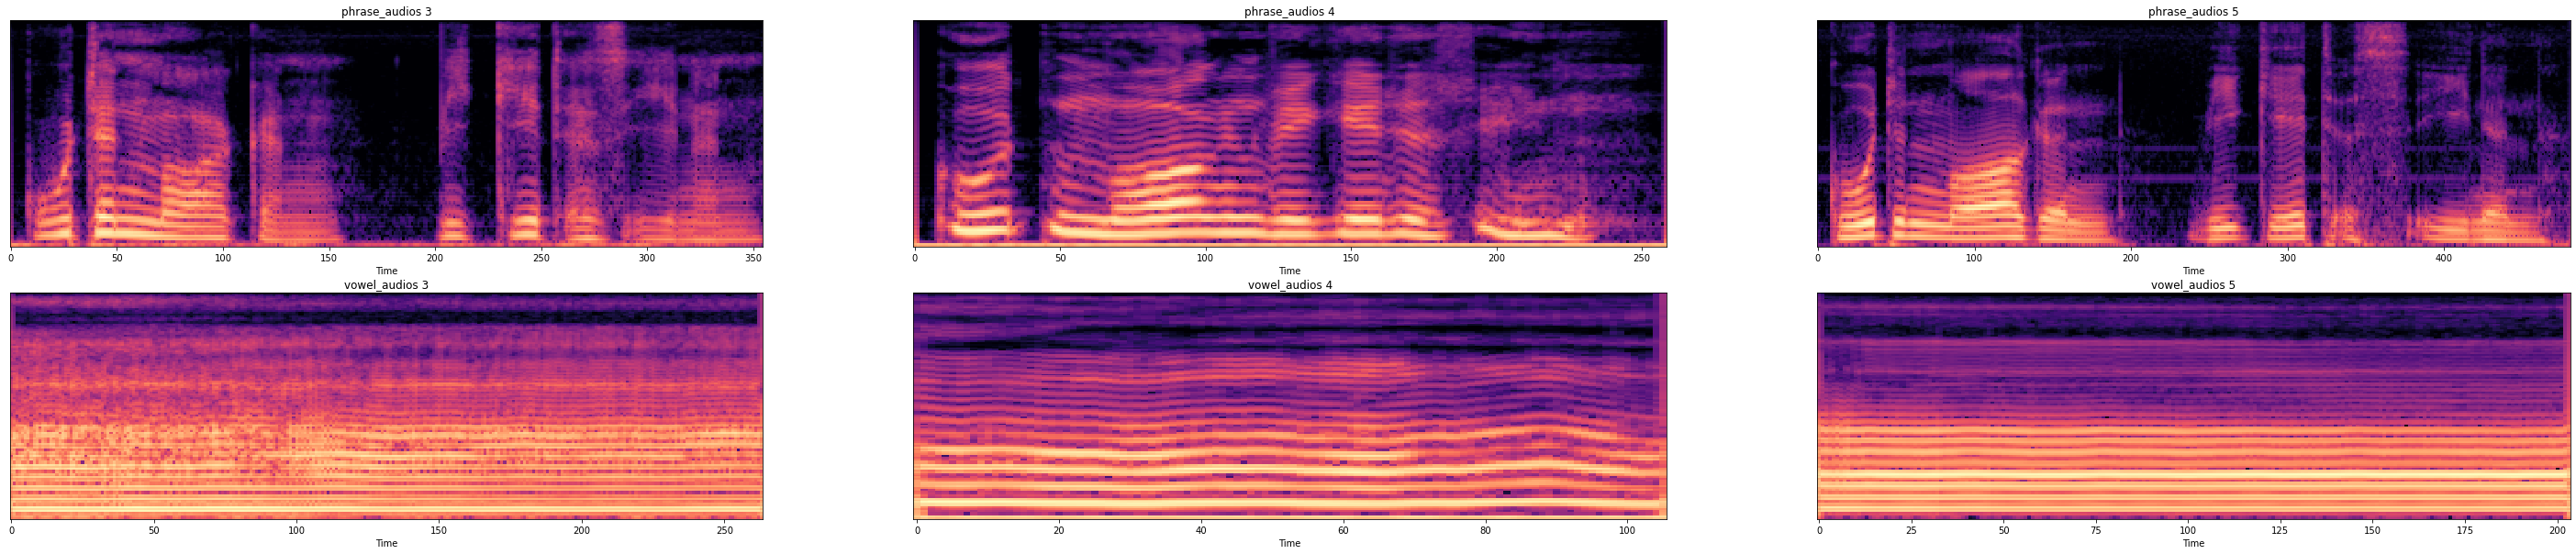

In [47]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5
    
for i in range(3,6):
    plt.subplot(2,3,i+1-3)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(phrase_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("phrase_audios "+str(i))

for i in range(3,6):
    plt.subplot(2,3,i+3+1-3)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(vowel_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("vowel_audios "+str(i))

Text(0.5, 1.0, 'disorder_audios 2')

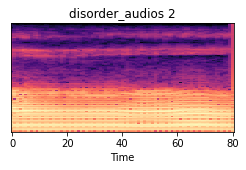

In [42]:
plt.figure(figsize=(4*1,1*2))#하나당 50,5
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(vowel_audios[2], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("disorder_audios "+str(i))

In [48]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


phrase_audios = []
vowel_audios = []

phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/904-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/928-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1447-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1277-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1257-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1664-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1713-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1444-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1551-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1790-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1832-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1950-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/2141-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/1940-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/2015-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/2219-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/2424-phrase.wav')
phrase_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/phrase/export/2538-phrase.wav')


vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/904-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/928-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1447-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1277-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1257-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1664-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1713-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1444-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1551-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1790-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1832-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1950-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/2141-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1940-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/2015-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/2219-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/2424-a_h.wav')
vowel_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/2538-a_h.wav')


phrase_audios =[ librosa.load(aud, sr=sr)[0] for aud in phrase_audios ]
vowel_audios =[ librosa.load(aud, sr=sr)[0] for aud in vowel_audios ]



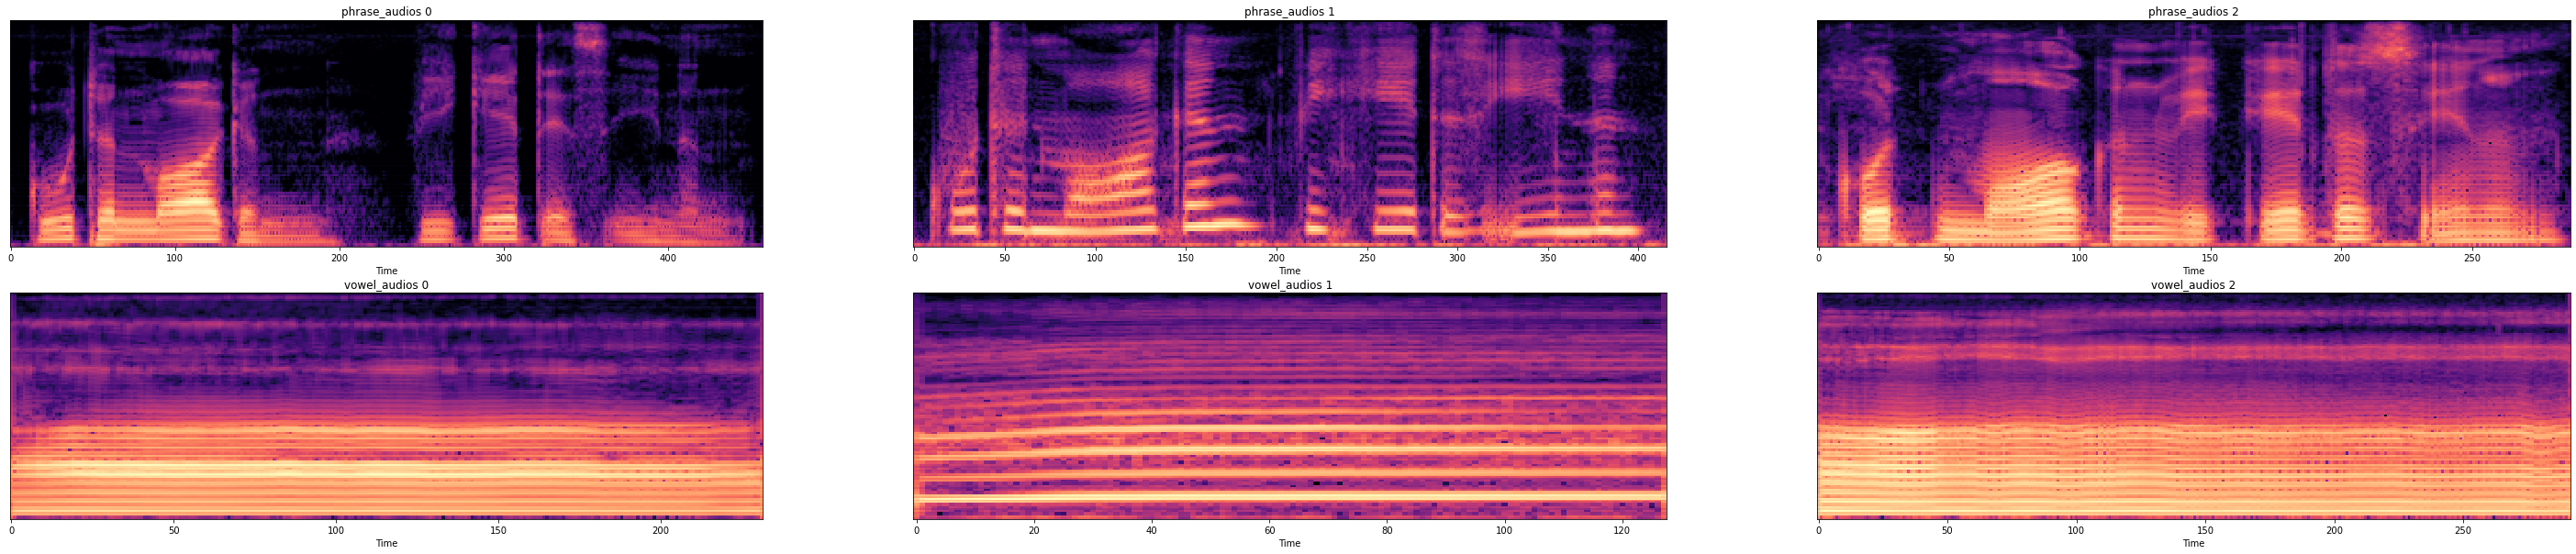

In [49]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(phrase_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("phrase_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(vowel_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("vowel_audios "+str(i))

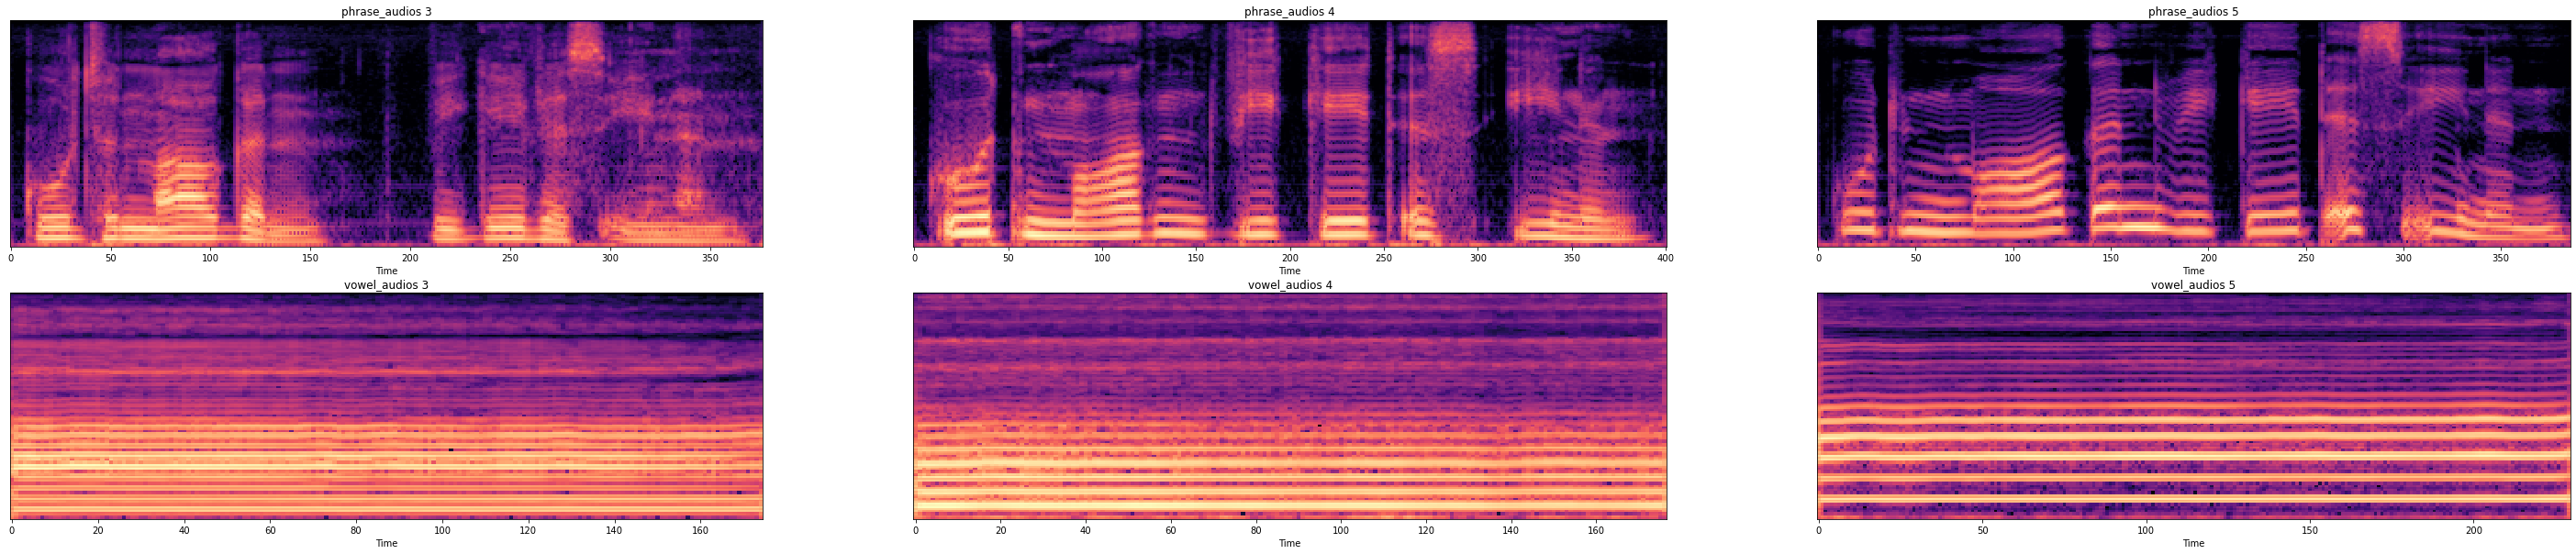

In [52]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3,6):
    plt.subplot(2,3,i+1-3)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(phrase_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("phrase_audios "+str(i))

for i in range(3,6):
    plt.subplot(2,3,i+3+1-3)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(vowel_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("vowel_audios "+str(i))

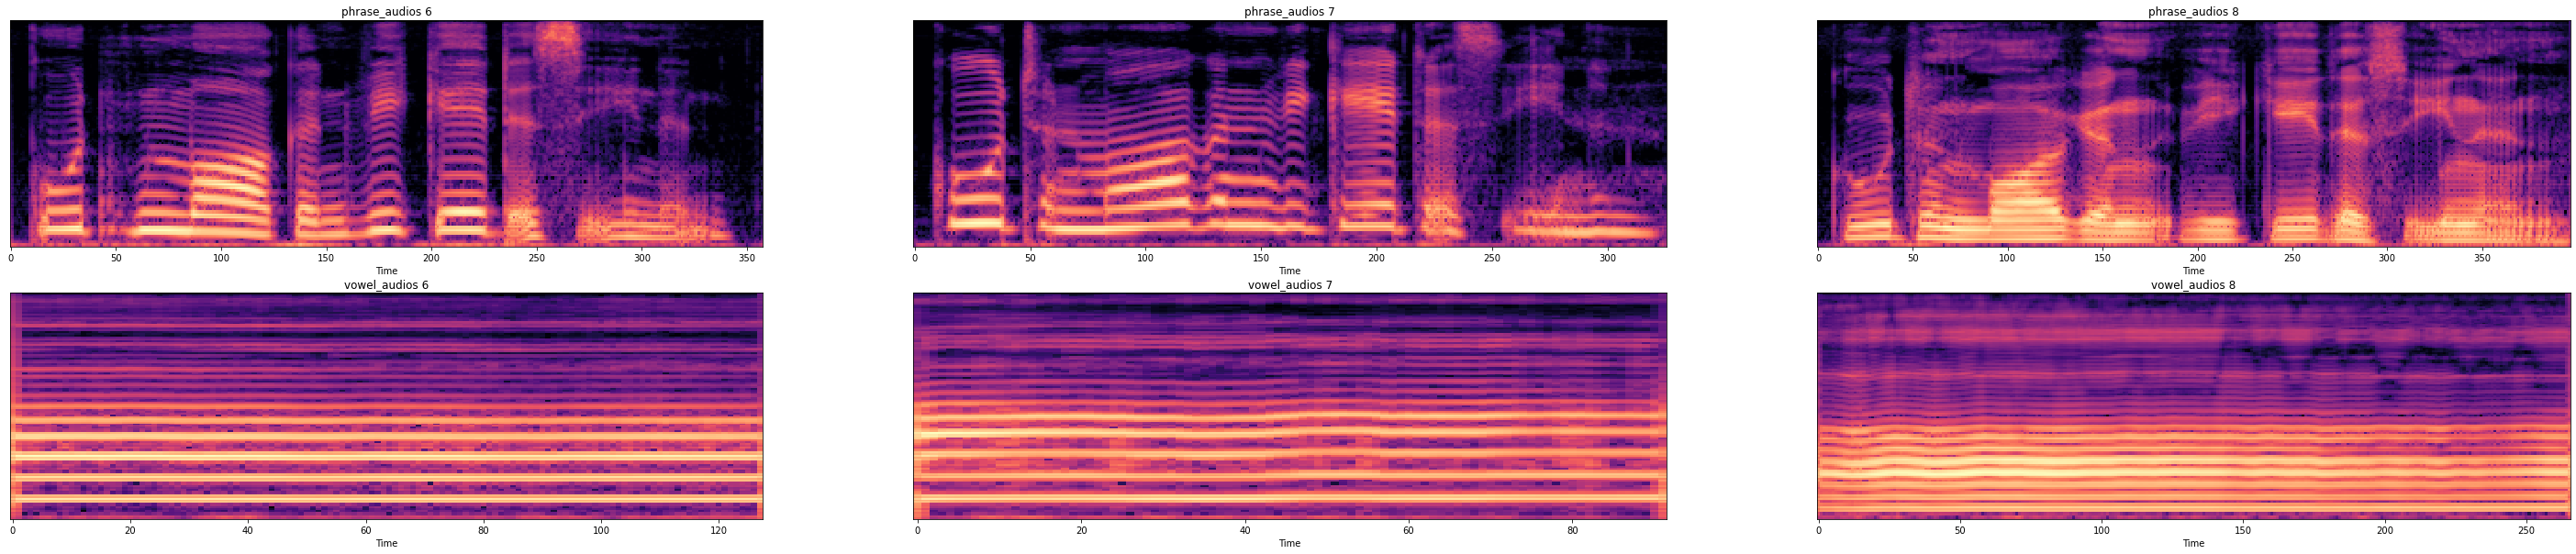

In [53]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(6,9):
    plt.subplot(2,3,i+1-6)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(phrase_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("phrase_audios "+str(i))

for i in range(6,9):
    plt.subplot(2,3,i+3+1-6)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(vowel_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("vowel_audios "+str(i))